In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

from sklearn.preprocessing import LabelEncoder

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings("ignore")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.tail()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [9]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.")

There are 200 rows and 5 columns in the dataset.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df[df.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [ ]:
#There are no duplicate values in the data.

In [12]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#As we can see that there are 4 numerical columns in the data we
#can also say that in some of the columns there might be some outliers present.
#We will look this into further while performing the data visualization.

In [14]:
df.nunique()


CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [15]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [16]:
#Before moving on further we will rename some columns so that
#we can move along easily with furthere visualization.



In [17]:
df.rename(columns = {"Annual Income (k$)": "Annual_Income", "Spending Score (1-100)": "Score"}, inplace = True)


In [18]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Score'], dtype='object')

In [19]:
#The column name has been changed successfuly



In [20]:
df.Gender.value_counts()


Female    112
Male       88
Name: Gender, dtype: int64

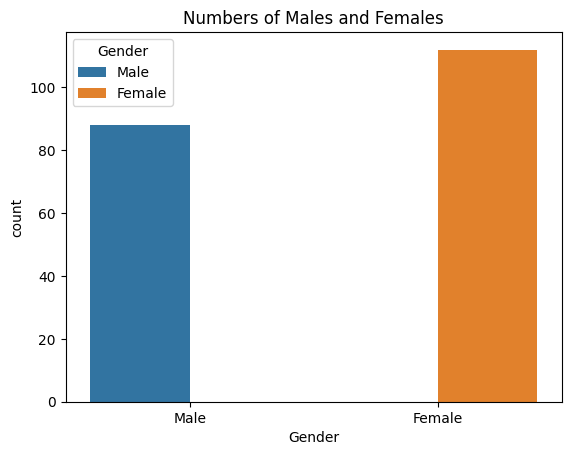

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = 'Gender', data = df, hue = 'Gender')
plt.title("Numbers of Males and Females");

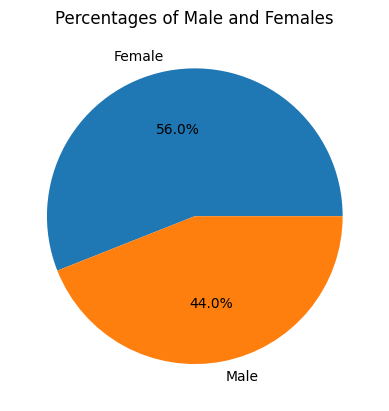

In [24]:
plt.pie(df.Gender.value_counts(), labels = ['Female', 'Male'], autopct ="%.01f%%")
plt.title('Percentages of Male and Females' );

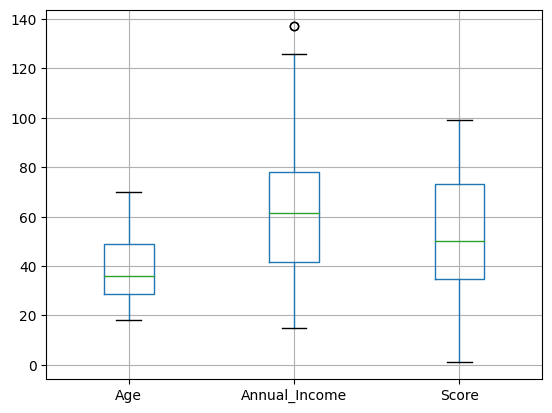

In [26]:
#Checking the Outliers in the dataset

df.iloc[:,1:].boxplot();


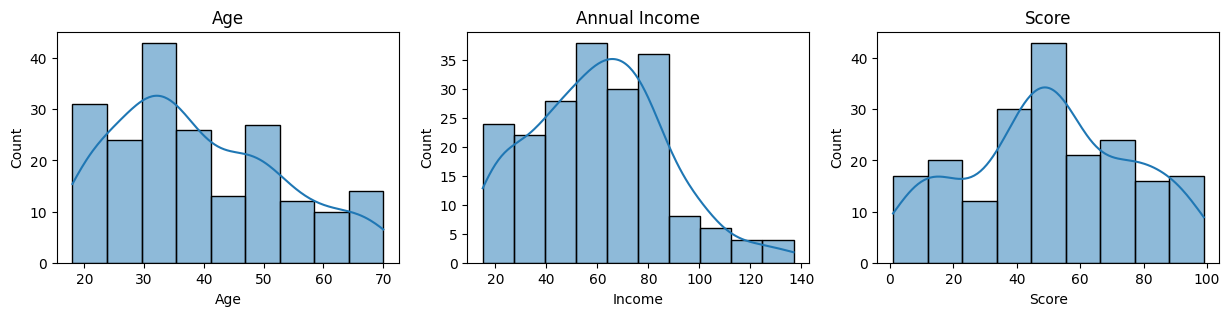

In [27]:
# the above box plot shows there are only one outlier so we need to remove this one
plt.figure(figsize = (15,3))
plt.subplot(1,3,1)

sns.histplot(df.Age, kde = True)
plt.title("Age")
plt.xlabel("Age");


plt.subplot(1,3,2)
sns.histplot(df.Annual_Income, kde = True)
plt.title("Annual Income")
plt.xlabel("Income");

plt.subplot(1, 3, 3)
sns.histplot(df.Score, kde = True)
plt.title("Score")
plt.xlabel("Score");

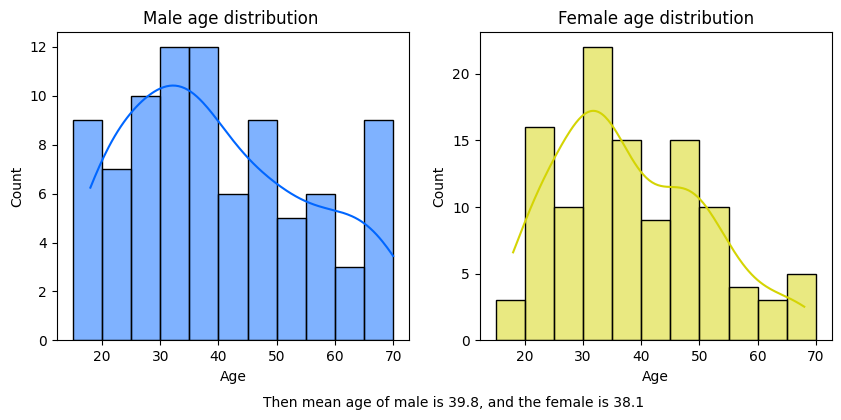

In [28]:
# Distribution of age with respect to gender
male = df[df.Gender == "Male"]["Age"]
female = df[df.Gender != "Male"]['Age']

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(male, color='#0066ff', bins = range(15,75,5), kde = True)
plt.title("Male age distribution ")

plt.subplot(1,2,2)
sns.histplot(female, color = '#D4D404', bins = range(15,75,5), kde = True)
plt.title("Female age distribution");
plt.text(-25,-5,f"Then mean age of male is {round(male.mean(),1)}, and the female is {round(female.mean(),1)}")

plt.show()

In [29]:
#can see that the mean and the median of male income is greater than female.



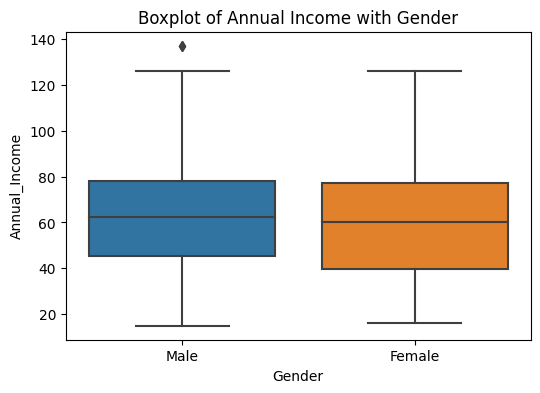

In [30]:
plt.figure(figsize = (6,4))
sns.boxplot(x = 'Gender', y = "Annual_Income", data = df)
plt.title("Boxplot of Annual Income with Gender")
plt.show()

In [31]:
#There are no outliers present in the income with respect to the gender.



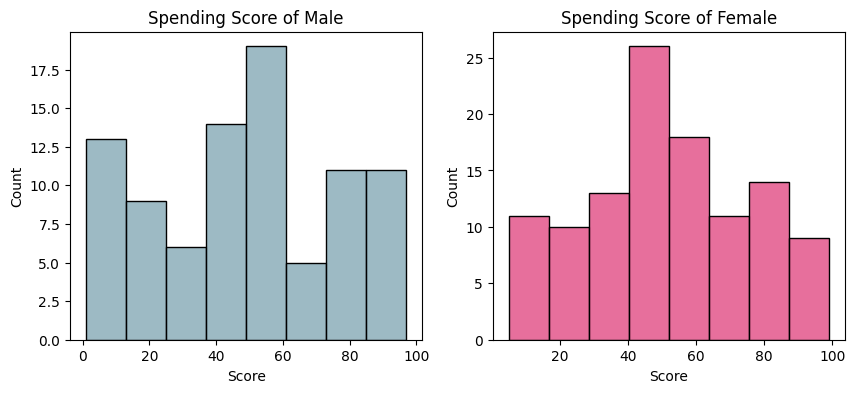

In [32]:
score_male = df[df.Gender == "Male"]["Score"]
score_female = df[df.Gender != "Male"]["Score"]

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(score_male, color = "#7CA3B1")
plt.title("Spending Score of Male")

plt.subplot(1,2,2)
sns.histplot(score_female, color = '#DF3F7B')
plt.title("Spending Score of Female")
plt.show()

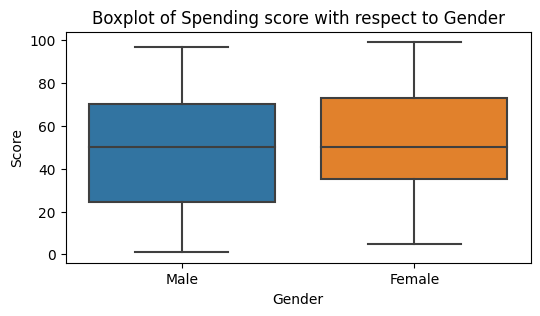

In [33]:
plt.figure(figsize = (6,3))

sns.boxplot(x = df.Gender, y = df.Score)
plt.title('Boxplot of Spending score with respect to Gender')
plt.show()

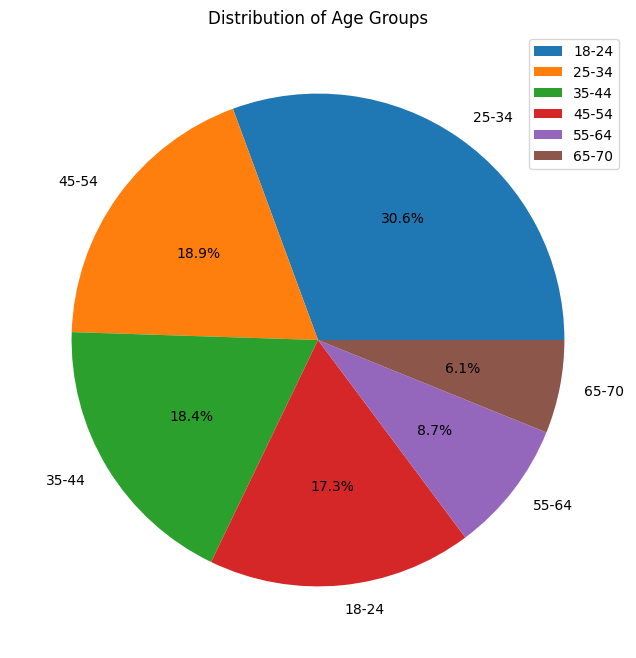

In [34]:
# Spending Score by age group

df['Age_Group'] = pd.cut(df.Age, bins = [18, 25, 35, 45, 55, 65, 70], labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])

plt.figure(figsize = (8, 8))
plt.pie(df.Age_Group.value_counts(), labels = df.Age_Group.value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Age Groups')
plt.legend(['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])
plt.show()

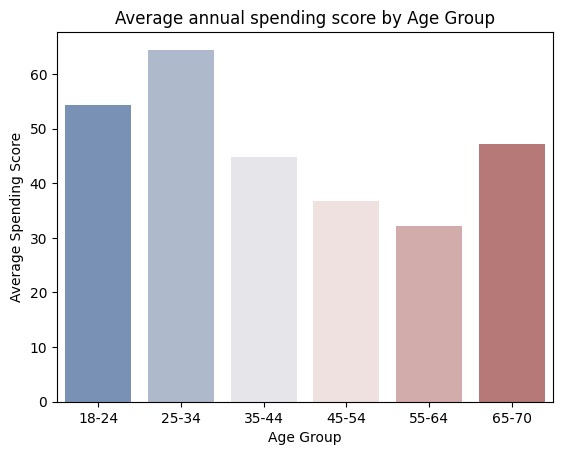

In [35]:
# Calculating the mean spending score of each age group.

mean_score = df.groupby('Age_Group')['Score'].mean()

sns.barplot(x = mean_score.index, y = mean_score.values, palette = 'vlag')
plt.title("Average annual spending score by Age Group")
plt.ylabel("Average Spending Score")
plt.xlabel("Age Group")
plt.show()

In [36]:
df.drop("Age_Group", axis = 1, inplace = True)


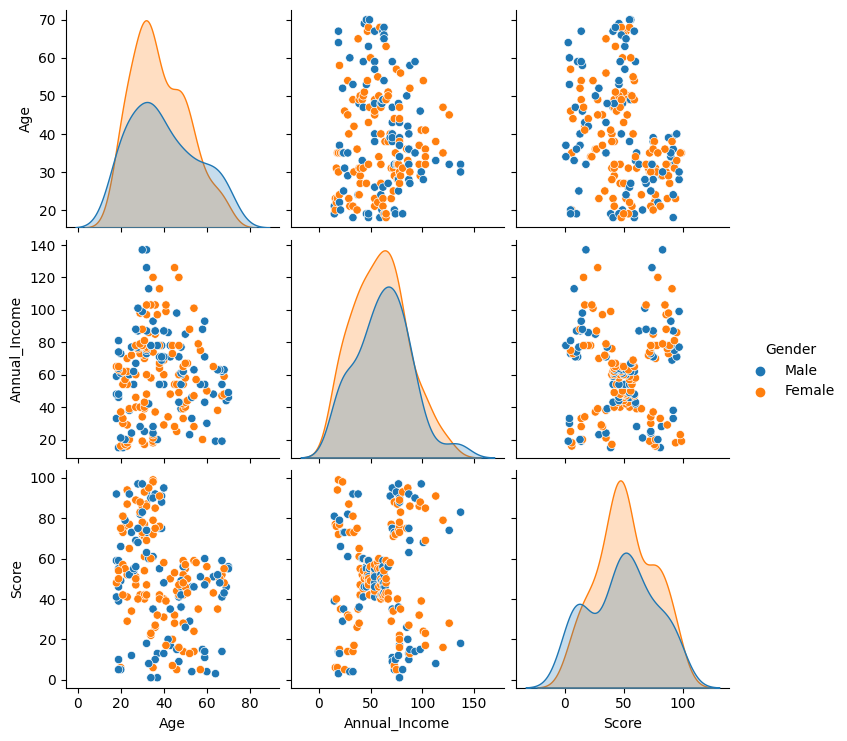

In [37]:
sns.pairplot(df.drop("CustomerID", axis = 1), hue = "Gender");


In [38]:
#From above plot we can say that the gender has no direct relation to segmenting customers.
#So now we can drop it and move on with other features which is why we will use X parameter from now on.



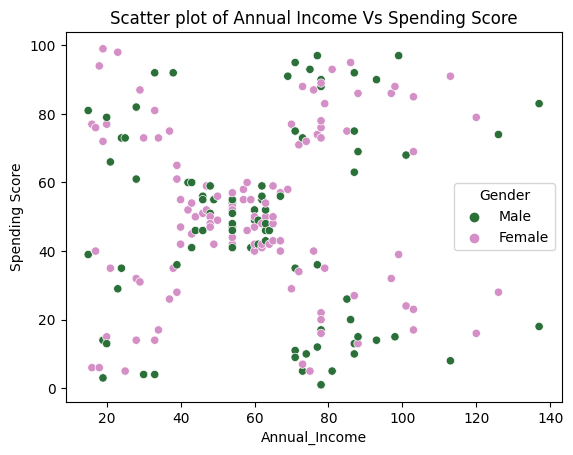

In [39]:
sns.scatterplot(x = df.Annual_Income, y = df.Score, hue = df.Gender, palette = 'cubehelix')
plt.title("Scatter plot of Annual Income Vs Spending Score")
plt.ylabel("Spending Score")
plt.show()

In [40]:
#Now we will perform Data Transforming¶


In [42]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder from sklearn.preprocessing

X  = df.copy()
# Now we will perform LabelEncoding on the Gender column.
enc = LabelEncoder()
X['Gender'] = enc.fit_transform(X['Gender'])
X.drop("CustomerID", axis = 1, inplace = True)
X.head()

,Gender,Age,Annual_Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

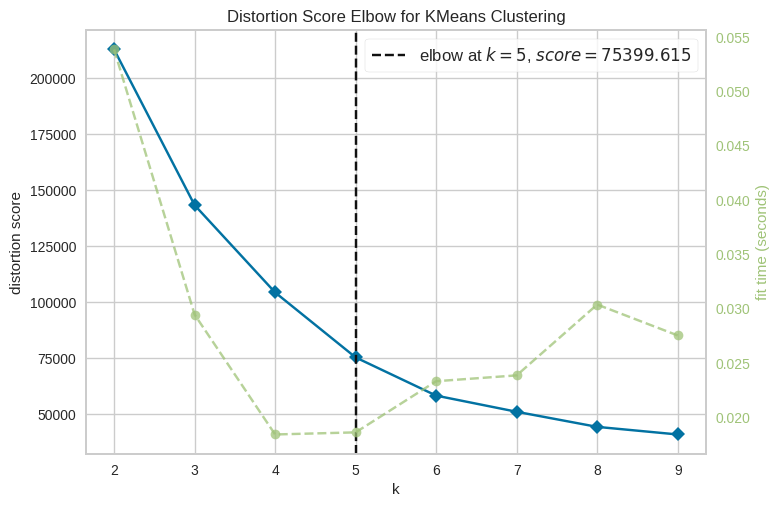

In [44]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

KM_model = KMeans(random_state = 0)
visualise = KElbowVisualizer(KM_model, k = (2, 10))


visualise.fit(X)
visualise.show()
plt.show()

In [45]:
#Another way to choose the best number of clusters is to plot the silhuette score in a function of number of clusters. Let's see the results.